In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
ox.config(log_console=True, use_cache=True)

In [3]:
# Specify the name that is used to search for the data
place_name = "Barcelona, Spain"

In [4]:
# Retrieve water points
water_tag = {'amenity':['drinking_water', 'water_point']}
water_points = ox.geometries_from_place(place_name, water_tag)
num_waterpoints = len(water_points)
water_points = water_points.to_crs(epsg=3857)

In [5]:
# Retrieve highways
street_tag = {'highway':['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential', 'pedestrian', 'living_streets', 'footway']}
streets = ox.geometries_from_place(place_name, street_tag)
streets = streets.to_crs(epsg=3857)

/home/rtala/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/rtala/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


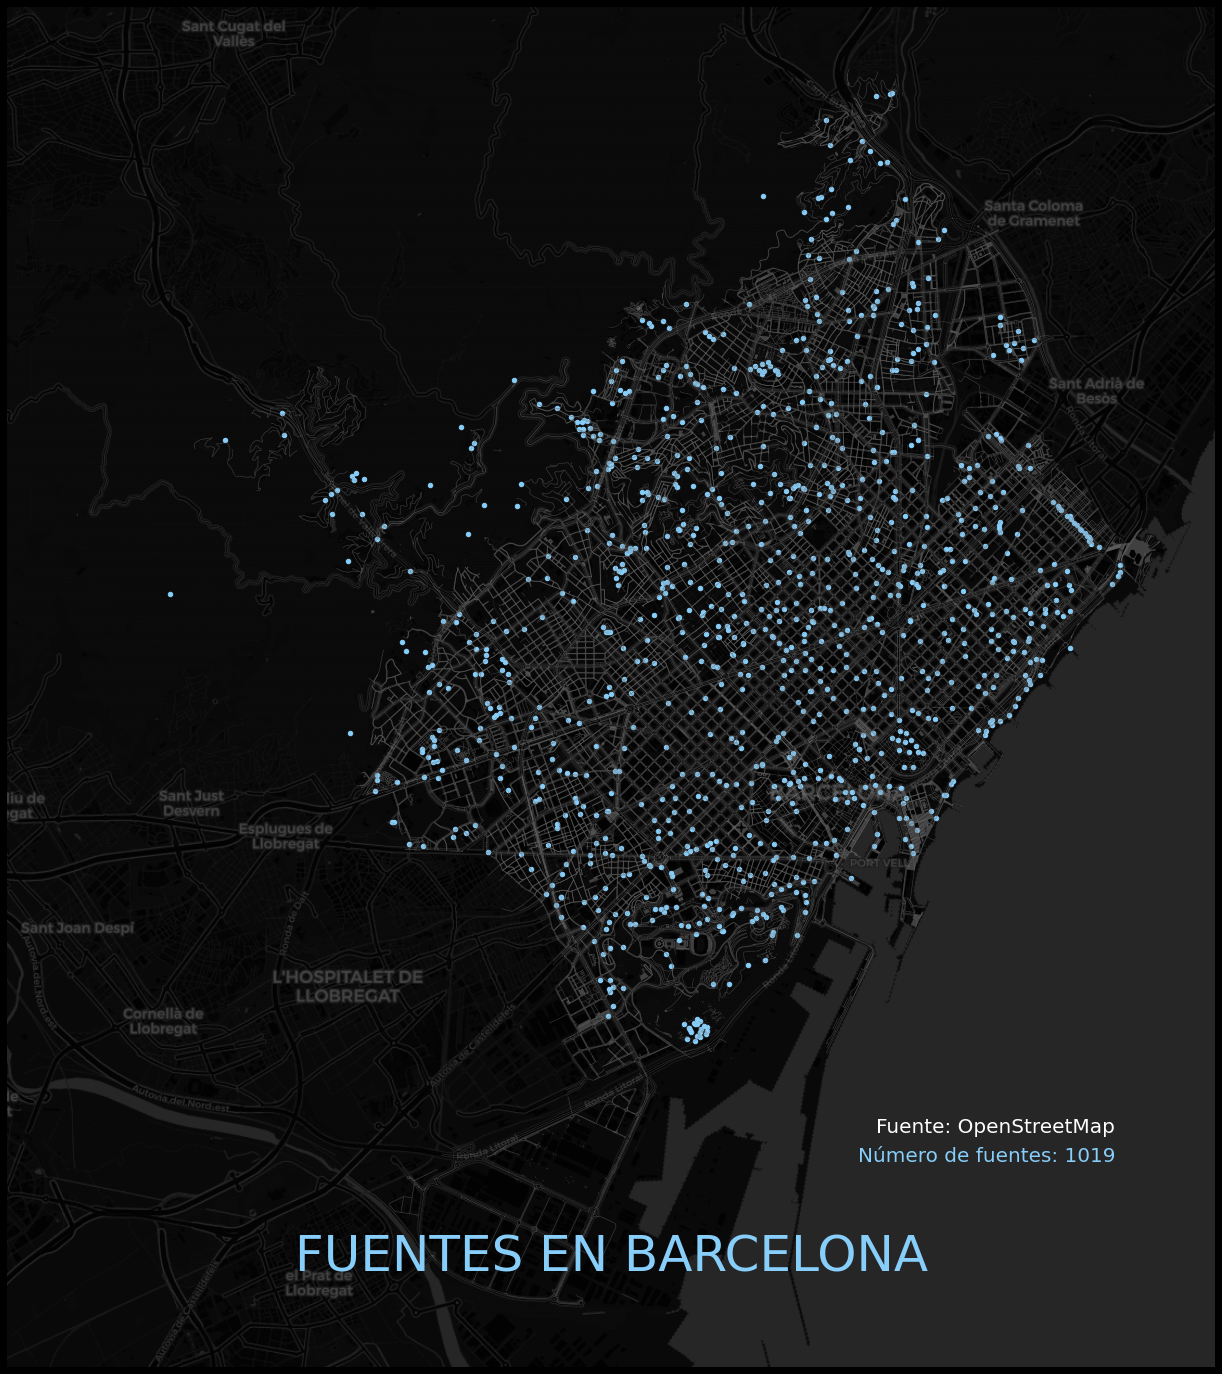

In [6]:
%matplotlib inline
# Plot
fig,ax = plt.subplots(figsize=(20,20), facecolor='black') 

plt.suptitle(f"FUENTES EN {place_name.split(', ')[0].upper()}", fontsize=50, color='#87cefa', y=0.10)

streets.plot(ax=ax, color='#777777', linewidth=0.5, alpha=0.5)

# Plot water points
water_points.plot(ax=ax, color='#87cefa', alpha=1, markersize=20)

ctx.add_basemap(ax, source='http://a.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png')

# Waterpoints text
text = f"Número de fuentes: {num_waterpoints}"
plt.text(0.85, 0.16, text, ha='right', va='top', transform=fig.transFigure, color='#87cefa', fontsize=20)

# Credits
plt.text(0.85, 0.18, 'Fuente: OpenStreetMap', ha='right', va='top', transform=fig.transFigure, color='white', fontsize=20)

ax.set_axis_off()

plt.tight_layout()